In [36]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from PIL import Image
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

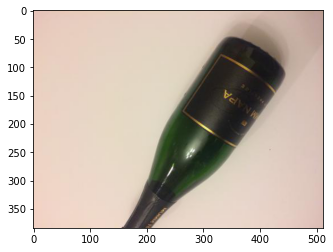

In [1]:
# The I/O module is used for importing the image
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
image = io.imread('./glass7.jpg')
plt.imshow(image);

In [3]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

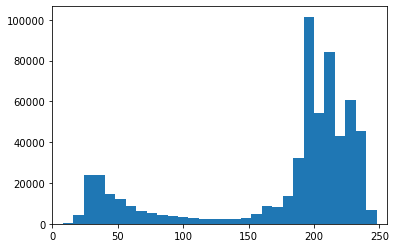

In [6]:
fig, ax = plt.subplots(1, 1)
ax.hist(image.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

In [37]:
# SEGMENTATION
def image_segment(filepath, outpath):
    img = cv2.imread(filepath)
    b,g,r = cv2.split(img)
    rgb_img = cv2.merge([r,g,b])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((2,2),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=3)
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
    # Threshold
    ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1
    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    plt.subplot(211),plt.imshow(rgb_img)
    plt.imsave(outpath,thresh)
    return get_average(outpath, filepath)
    
def get_average(filepath, oripath):
    im = Image.open(filepath) # Can be many different formats.
    pix = im.load()
    pixel_dic = {}
    for i in range(im.size[0]):
        for j in range(im.size[1]):
            rgba = pix[i, j]
            if rgba in pixel_dic:
                pixel_dic[rgba].append((i, j))
            else:
                pixel_dic[rgba] = [(i, j)]
    maximum = -1
    best_key = ""
    for key in pixel_dic:
        if (maximum == -1):
            maximum = len(pixel_dic[key])
            best_key = key
        else:
            if len(pixel_dic[key]) < maximum:
                best_key = key
    average = [0, 0, 0]
    im_glass = Image.open(oripath) # Can be many different formats.
    pix_glass = im_glass.load()
    print(pix_glass[0, 0])
    for pixel in pixel_dic[best_key]:
        a, b, c = pix_glass[pixel[0], pixel[1]]
        average[0] += a
        average[1] += b
        average[2] += c
    average[0] = float(average[0] / len(pixel_dic[best_key]))
    average[1] = float(average[1] / len(pixel_dic[best_key]))
    average[2] = float(average[2] / len(pixel_dic[best_key]))
    return average

In [30]:
#Adds the pixels of the segmented images into a dictionary

im = Image.open('./thresh.png') # Can be many different formats.
pix = im.load()
print(im.size)  # Get the width and hight of the image for iterating over
print(pix[0,0])  # Get the RGBA Value of the a pixel of an image

pixel_dic = {}
for i in range(im.size[0]):
    for j in range(im.size[1]):
        rgba = pix[i, j]
        if rgba in pixel_dic:
            pixel_dic[rgba].append((i, j))
        else:
            pixel_dic[rgba] = [(i, j)]

(512, 384)
(68, 1, 84, 255)


In [23]:
#Get pixel set of bottle

maximum = -1
best_key = ""
for key in pixel_dic:
    if (maximum == -1):
        maximum = len(pixel_dic[key])
        best_key = key
    else:
        if len(pixel_dic[key]) < maximum:
            best_key = key
print(best_key)

(253, 231, 36, 255)


In [31]:
#Get average RGB Value of Bottle
average = [0, 0, 0]
im_glass = Image.open('./glass7.jpg') # Can be many different formats.
pix_glass = im_glass.load()
print(pix_glass[0, 0])
for pixel in pixel_dic[best_key]:
    a, b, c = pix_glass[pixel[0], pixel[1]]
    average[0] += a
    average[1] += b
    average[2] += c
average[0] = float(average[0] / len(pixel_dic[best_key]))
average[1] = float(average[1] / len(pixel_dic[best_key]))
average[2] = float(average[2] / len(pixel_dic[best_key]))
average

(229, 195, 185)


[55.06221593778406, 56.09196040803959, 45.06067568932431]

./glass/White/glass38.jpg ./glassout/white0.png
(236, 220, 204)
./glass/White/glass39.jpg ./glassout/white1.png
(219, 207, 193)
./glass/White/glass13.jpg ./glassout/white2.png
(175, 163, 151)
./glass/White/glass12.jpg ./glassout/white3.png
(164, 161, 142)
./glass/White/glass16.jpg ./glassout/white4.png
(175, 163, 149)
./glass/White/glass29.jpg ./glassout/white5.png
(215, 218, 233)
./glass/White/glass15.jpg ./glassout/white6.png
(130, 112, 92)
./glass/White/glass14.jpg ./glassout/white7.png
(170, 161, 146)
./glass/White/glass3.jpg ./glassout/white8.png
(184, 172, 160)
./glass/White/glass2.jpg ./glassout/white9.png
(184, 168, 155)
./glass/White/glass5.jpg ./glassout/white10.png
(190, 178, 166)
./glass/White/glass49.jpg ./glassout/white11.png
(231, 211, 187)
./glass/White/glass4.jpg ./glassout/white12.png
(169, 155, 142)
./glass/White/glass6.jpg ./glassout/white13.png
(192, 178, 165)
./glass/White/glass52.jpg ./glassout/white14.png
(233, 215, 195)
./glass/White/glass51.jpg ./glassout/whit

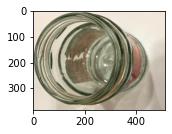

In [41]:
# assign directory
directory = './glass/White'
 
# iterate over files in
# that directory
white_average = [0, 0, 0]
white_count = 0
green_average = [0, 0, 0]
green_count = 0
brown_average = [0, 0, 0]
brown_count = 0
cat = "white"
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if f[-9:] != ".DS_Store":
        # checking if it is a file
        outpath = "./glassout/" + cat + str(white_count) + ".png"
        print(f, outpath)
        value = image_segment(f, outpath)
        white_count += 1
        white_average[0] += value[0]
        white_average[1] += value[1]
        white_average[2] += value[2]
white_average[0] = int(white_average[0]/white_count)
white_average[1] = int(white_average[1]/white_count)
white_average[2] = int(white_average[2]/white_count)

./glass/Brown/glass73.jpg ./glassout/brown0.png
(210, 213, 228)
./glass/Brown/glass72.jpg ./glassout/brown1.png
(226, 230, 242)
./glass/Brown/glass70.jpg ./glassout/brown2.png
(239, 241, 254)
./glass/Brown/glass1.jpg ./glassout/brown3.png
(191, 189, 176)
./glass/Brown/glass53.jpg ./glassout/brown4.png
(232, 236, 248)
./glass/Brown/glass9.jpg ./glassout/brown5.png
(211, 208, 201)
./glass/Brown/glass79.jpg ./glassout/brown6.png
(227, 229, 242)
./glass/Brown/glass8.jpg ./glassout/brown7.png
(214, 212, 199)
./glass/Brown/glass54.jpg ./glassout/brown8.png
(229, 231, 244)
./glass/Brown/glass69.jpg ./glassout/brown9.png
(210, 200, 188)
./glass/Brown/glass19.jpg ./glassout/brown10.png
(222, 224, 237)
./glass/Brown/glass26.jpg ./glassout/brown11.png
(229, 215, 202)
./glass/Brown/glass27.jpg ./glassout/brown12.png
(226, 228, 241)
./glass/Brown/glass33.jpg ./glassout/brown13.png
(240, 220, 196)
./glass/Brown/glass22.jpg ./glassout/brown14.png
(216, 219, 234)
./glass/Brown/glass36.jpg ./glassout/b

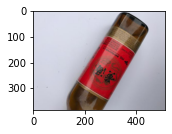

In [43]:
directory = './glass/Brown'
cat = "brown"
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if f[-9:] != ".DS_Store":
        # checking if it is a file
        outpath = "./glassout/" + cat + str(brown_count) + ".png"
        print(f, outpath)
        value = image_segment(f, outpath)
        brown_count += 1
        brown_average[0] += value[0]
        brown_average[1] += value[1]
        brown_average[2] += value[2]
brown_average[0] = int(brown_average[0]/brown_count)
brown_average[1] = int(brown_average[1]/brown_count)
brown_average[2] = int(brown_average[2]/brown_count)

./glass/Green/glass10.jpg ./glassout/green0.png
(246, 216, 205)
./glass/Green/glass11.jpg ./glassout/green1.png
(240, 206, 194)
./glass/Green/glass17.jpg ./glassout/green2.png
(228, 230, 243)
./glass/Green/glass66.jpg ./glassout/green3.png
(227, 230, 245)
./glass/Green/glass105.jpg ./glassout/green4.png
(223, 222, 227)
./glass/Green/glass7.jpg ./glassout/green5.png
(229, 195, 185)
./glass/Green/glass85.jpg ./glassout/green6.png
(255, 255, 255)
./glass/Green/glass68.jpg ./glassout/green7.png
(222, 226, 238)
./glass/Green/glass82.jpg ./glassout/green8.png
(220, 222, 235)
./glass/Green/glass30.jpg ./glassout/green9.png
(217, 220, 235)


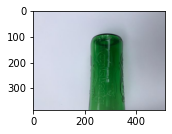

In [46]:
directory = './glass/Green'
cat = "green"
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if f[-9:] != ".DS_Store":
        # checking if it is a file
        outpath = "./glassout/" + cat + str(green_count) + ".png"
        print(f, outpath)
        value = image_segment(f, outpath)
        green_count += 1
        green_average[0] += value[0]
        green_average[1] += value[1]
        green_average[2] += value[2]
green_average[0] = int(green_average[0]/green_count)
green_average[1] = int(green_average[1]/green_count)
green_average[2] = int(green_average[2]/green_count)

In [47]:
print(green_average)

[75, 108, 73]


(224, 227, 242)


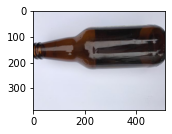

In [52]:
def determine_color(r, g, b):
    white = [145, 138, 126]
    brown = [73, 56, 50]
    green = [75, 108, 73]
    white_dis = pow(white[0] - r, 2) + pow(white[1] - g, 2) + pow(white[2] - b, 2)
    brown_dis = pow(brown[0] - r, 2) + pow(brown[1] - g, 2) + pow(brown[2] - b, 2)
    green_dis = pow(green[0] - r, 2) + pow(green[1] - g, 2) + pow(green[2] - b, 2)
    if (min(white_dis, brown_dis, green_dis) == white_dis):
        return "white"
    if (min(white_dis, brown_dis, green_dis) == green_dis):
        return "green"
    return "brown"

def what_color(filepath, outpath):
    value = image_segment(filepath, outpath)
    return determine_color(value[0], value[1], value[2])

filepath = "./glass93.jpg"
this_color = what_color(filepath, "./glassout/swathi2.png")

In [53]:
this_color

'brown'